In [8]:
def return_parameters(parameters_file : str):
    with open(parameters_file, 'r') as f:
        TIME_dt_DTS = f.readline().split(' ')
        TIME = (int)(TIME_dt_DTS[0])
        dt = (float)(TIME_dt_DTS[1])
        DTS = (int)(TIME_dt_DTS[2])
        
    return TIME, dt, DTS

In [9]:
def set_data(file_to_read : str, field : list):
    
    field.clear()
    
    with open(file_to_read, 'r') as f:
        next(f)
        for t in range(int(TIME/DTS)):
            field.append((float)(f.readline()))

In [57]:
def set_a_whole_plot(field : dict):
    
    for name in field.keys():
        
        f = field[ name ]
        
        if ( '_s' not in name ):
            set_data( f['file_to_read'], f['data'] )
        else:
            f_s = field[name[:-2]]
            f['data'] = (f_s['data'])[ int((f['t_range'])[0]/DTS) : int((f['t_range'])[-1]/DTS+1) ]
            

In [58]:
def draw_a_whole_plot(fig, axes, field : dict):
    
    for name in field.keys():
        
        f = field[ name ]
        
        axes[ f['axes_position'] ].set_title( f['axes_name'] )
        if ( '_s' not in name ):
            axes[ f['axes_position'] ].plot( f['t_range'], f['data'], color=f['color'] )
        else:
            f_s = field[name[:-2]]
            axes[ f_s['axes_position'] ].plot( f['t_range'], f['data'], color=f['color'] )
            axes[ f['axes_position'] ].plot( f['t_range'], f['data'], color=f['color'] )


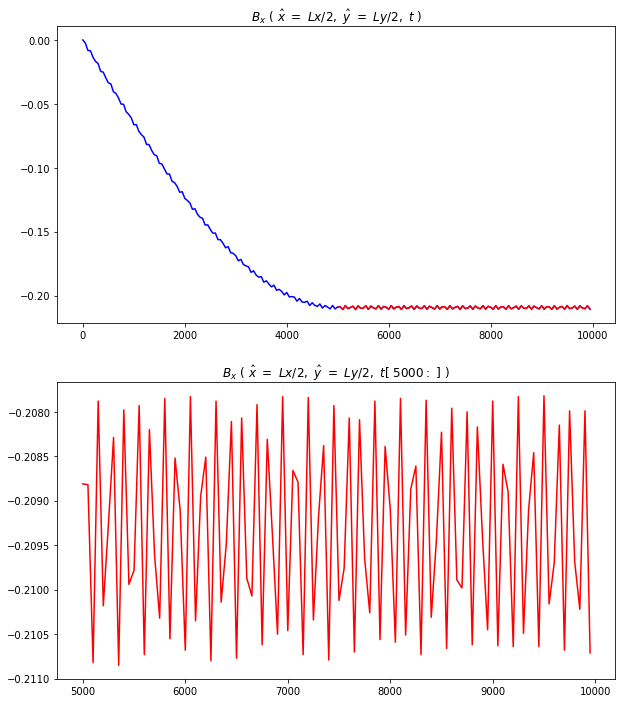

In [59]:
import matplotlib.pyplot as plt
import numpy as np

TIME, dt, DTS = return_parameters('Bx.txt')

TINJ = 5000
TINJ_ = int(5000/DTS)

field = {
    'Bx'   : { 't_range': list(range(0, TIME, DTS)),
               'data': [],
               'file_to_read' : 'Bx.txt',
               'axes_position' : 0,
               'axes_name': '$B_x\ (\ \hatx\ =\ Lx/2,\ \haty\ =\ Ly/2,\ t\ )$', 
               'color': 'blue',
             },
    'Bx_s' : { 't_range': list(range(TINJ, TIME, DTS)),
               'data': [],
               'axes_position' : 1,
               'axes_name': '$B_x\ (\ \hatx\ =\ Lx/2,\ \haty\ =\ Ly/2,\ t[\ ' + str(TINJ) + ':\ ]\ )$', 
               'color': 'red',
             },
}

ncols = 1
nrows = len( field.keys() )
        
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,12))

set_a_whole_plot(field)
draw_a_whole_plot(fig, axes, field)

fig.savefig("Bz(0.5'Ly, 0.5'Ly, t).png")